# SVM and XGBoost

## Preliminars

### Import Libraries

In [1]:
from Bio.SeqIO import PirIO
import h5py
from time import time
import numpy as np
import sys

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
import sklearn.model_selection
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

import pandas as pd

### Import Data

In [59]:
# path to git repo
preamble = "."

h5py_file = preamble+'/data/ec_vs_NOec_pide100_c50.h5'
fasta_path = preamble+'/data/nonRed_dataset/ec_vs_NOec_pide20_c50_train.fasta'
anno = preamble+'/data/annotations/merged_anno.txt'

print(h5py_file)

print('LOAD - This may take a while, if you run this the first time!')
# https://stackoverflow.com/questions/20928136/input-and-output-numpy-arrays-to-h5py

count = 0

X =  []
y = []

def reduceAnno(anno: str):
    y.append(int(anno[0]))
    return i


with open(anno) as fp:
    with h5py.File(h5py_file, 'r') as h5:
        i = 0
        for line in fp:
            input = line.strip().split('\t')
            if input[0] in h5:

                X.append(np.asarray(h5[input[0][:]]))

                reduceAnno(input[1])

                i += 1

            if i == 40000:
                break

            else:
                pass
                # print(input[0], 'NOT FOUND')

            sys.stdout.write('\r' + str(i))
            
            

./data/ec_vs_NOec_pide100_c50.h5
LOAD - This may take a while, if you run this the first time!
39999

### Train/Test Split

In [60]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.10)

# SVM

In [89]:
from sklearn.svm import SVC

In [90]:
svm = SVC()

In [91]:
svm.fit(X_train, y_train)

SVC()

In [92]:
y_pred = svm.predict(X_test)

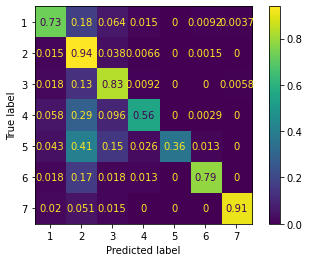

In [137]:
sklearn.metrics.plot_confusion_matrix(svm, X_test, y_test, normalize='true')

In [146]:
print('Accuracy', sk.metrics.accuracy_score(y_test,y_pred))
print('Macro-precision', sk.metrics.precision_score(y_test, y_pred, average="macro"))
print('Macro-recall',recall_score(y_test, y_pred , average="macro"))
print('Macro-f1',f1_score(y_test, y_pred, average="macro"))

Accuracy 0.803
Macro-precision 0.8774949073087333
Macro-recall 0.7315765287581533
Macro-f1 0.7751374188657965


# XGBoost

In [6]:
from xgboost import XGBClassifier

In [7]:
xgb = XGBClassifier()

In [8]:
setattr(xgb, 'verbosity', 1)

In [68]:
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)

In [69]:
X_test_array = np.array(X_test)
y_test_array = np.array(y_test)

In [63]:
xgb.fit(X_train_array, y_train_array)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

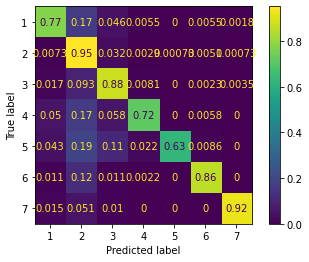

In [135]:
sklearn.metrics.plot_confusion_matrix(xgb, X_test_array, y_test_array, normalize='true')

In [148]:
y_xgb = xgb.predict(X_test_array)

In [149]:
print('Accuracy', sk.metrics.accuracy_score(y_test,y_xgb))
print('Macro-precision', sk.metrics.precision_score(y_test, y_xgb, average="macro"))
print('Macro-recall',recall_score(y_test, y_xgb , average="macro"))
print('Macro-f1',f1_score(y_test, y_xgb, average="macro"))

Accuracy 0.85975
Macro-precision 0.9118476393491061
Macro-recall 0.8179436150418368
Macro-f1 0.8551682817053078


# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

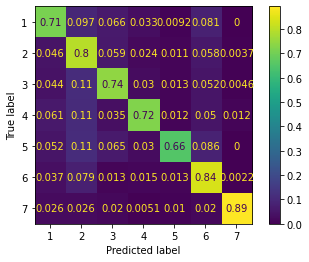

In [136]:
sklearn.metrics.plot_confusion_matrix(knn, X_test, y_test, normalize='true')

In [143]:
knn_test = knn.predict(X_test)

In [145]:
print('Accuracy', sk.metrics.accuracy_score(y_test,knn_test))
print('Macro-precision', sk.metrics.precision_score(y_test, knn_test, average="macro"))
print('Macro-recall',recall_score(y_test, knn_test , average="macro"))
print('Macro-f1',f1_score(y_test, knn_test, average="macro"))

Accuracy 0.7695
Macro-precision 0.773339207780672
Macro-recall 0.7665407620442348
Macro-f1 0.7671517633453339


# Classifier Comparisson

In [22]:
import sklearn as sk

In [79]:
def roc_auc_f(y_test_score, y_train_score, y_test = y_test, y_train = y_train, n_classes = 7):
    fpr = dict()
    tpr = dict()
    thr = dict()
    roc_auc = dict()
    y_test = sk.preprocessing.label_binarize(y_test, classes=[i for i in range(n_classes)])
    y_train = sk.preprocessing.label_binarize(y_train, classes=[i for i in range(n_classes)])
    
############### Test ###############    
    for i in range(n_classes): #fpr, tpr and roc for each class
        fpr[i], tpr[i], thr[i] = sk.metrics.roc_curve(y_test[:, i], y_test_score[:, i], drop_intermediate=False)
        roc_auc[i] = sk.metrics.auc(fpr[i], tpr[i])   
    
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))# get all fpr
    mean_tpr = np.zeros_like(all_fpr)
    
    for i in range(n_classes): # Interpolate to get tpr at these values
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
    mean_tpr /= n_classes 

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = sk.metrics.auc(fpr["macro"], tpr["macro"]) #auc
    return fpr, tpr, roc_auc

In [96]:
svm_prob = svm.predict(X_test)
xgb_prob = xgb.predict_proba(X_test_array)
knn_prob = knn.predict_proba(X_test)

In [131]:
all_fpr = np.unique(np.concatenate([fpr_knn[i] for i in range(7)]))# get all fpr
mean_tpr = np.zeros_like(all_fpr)
for i in range(7): # Interpolate to get tpr at these values
        mean_tpr += np.interp(all_fpr, fpr_knn[i], tpr_knn[i])
mean_tpr /= 7
tpr_knn["macro"] = mean_tpr
roc_auc_knn[0] = 0.0
roc_auc_knn["macro"] = sk.metrics.auc(fpr_knn["macro"], tpr_knn["macro"])

In [99]:
#fpr_svm, tpr_svm, roc_auc_svm = roc_auc_f(svm_prob, svm_prob)
fpr_xgb, tpr_xgb, roc_auc_xgb = roc_auc_f(xgb_prob, xgb_prob)
fpr_knn, tpr_knn, roc_auc_knn = roc_auc_f(knn_prob, knn_prob)

/Users/jlrestrepol/miniconda2/envs/ProtPred/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [108]:
tpr_xgb[0] = np.nan_to_num(tpr_xgb[0])

In [132]:
tpr_xgb

{0: array([0., 0., 0., ..., 0., 0., 0.]),
 1: array([0., 0., 0., ..., 1., 1., 1.]),
 2: array([0., 0., 0., ..., 1., 1., 1.]),
 3: array([0., 0., 0., ..., 1., 1., 1.]),
 4: array([0., 0., 0., ..., 1., 1., 1.]),
 5: array([0., 0., 0., ..., 1., 1., 1.]),
 6: array([0.        , 0.        , 0.        , ..., 0.99562363, 0.99781182,
        1.        ]),
 'macro': array([0.        , 0.        , 0.        , ..., 0.85589247, 0.85589247,
        0.85714286])}

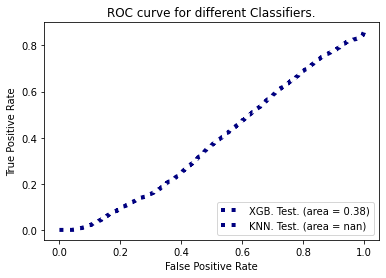

In [133]:
fig, ax = plt.subplots()

# max depth = 4
#ax.plot(fpr_svm["macro"], tpr_svm["macro"], label='SVM. Test. (area = {0:0.2f})'.format(roc_auc_svm["macro"]), 
#         color='navy', linestyle=':', linewidth=4)

ax.plot(fpr_xgb["macro"], tpr_xgb["macro"], label='XGB. Test. (area = {0:0.2f})'.format(roc_auc_xgb["macro"]), 
         color='navy', linestyle=':', linewidth=4)

ax.plot(fpr_knn["macro"], tpr_knn["macro"], label='KNN. Test. (area = {0:0.2f})'.format(roc_auc_knn["macro"]), 
         color='navy', linestyle=':', linewidth=4)

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for different Classifiers.')
ax.legend(loc="lower right")